# Due June/20/2018 11:59:59 PM, PST.

## Probability Review (10%)
In a certain day care class, 30% of the children have grey eyes, 50% of them have blue and the other 20%'s eyes are in other colors. One day they play a game together. In the first run, 65% of the grey eye ones, 82% of the blue eyed ones and 50% of the children with other eye color were selected. Now, if a child is selected randomly from the class, and we know that he/she was not in the first game, what is the probability that the child has blue eyes?

In [ ]:
 30.50%

## Linear Algebra Review (10%)
(1) What is Gram-Schmidt procedure ? 
<br>
(2) Do Gram-Schmidt procedure for the vectors x1 = (1, 1 ,0), x2 = (1, 0, 1), x3 = (0, 1, 1) in $R^3$.

In [35]:
1.the Gram–Schmidt process is a method for orthonormalising a set of vectors in an inner product space, most commonly the Euclidean space Rn equipped with the standard inner product


import numpy as np
import math

x1 = np.array([1,1,0])
x2 = np.array([1,0,1])
x3 = np.array([0,1,1])


v1 = x1

v1_norm = np.linalg.norm(v1)

e1 = v1 / math.sqrt((np.dot(v1,v1)))

x2_v1 = np.dot(x2,v1)

v2 = x2 - (x2_v1 / (v1_norm ** 2))*v1

e2 = v2 / math.sqrt((np.dot(v2,v2)))


x3_v1 = np.dot(x3, v1)

x3_v2 = np.dot(x3, v2)

v2_norm = np.linalg.norm(v2)

v3 = x3 - (x3_v1/(v1_norm**2))*v1 - (x3_v2/(v2_norm**2))*v2

e3 = v3 / math.sqrt((np.dot(v3,v3)))

print("e1: {}".format(e1))
print("e2: {}".format(e2))
print("e3: {}".format(e3))



e1: [0.70710678 0.70710678 0.        ]
e2: [ 0.40824829 -0.40824829  0.81649658]
e3: [-0.57735027  0.57735027  0.57735027]


## Hessian for Logistic Regression (10%)
Consider the average empirical loss  for logistic regression:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \log (1 + e^{-y_i \theta^T x_i}) = - \frac{1}{m} \sum_{i=1}^{m} \log (h_{\theta}(y_i x_i)))$$

where $h_{\theta}(x) = g(\theta^{T} x)$ and $g(z) = \frac{1}{1 + e^{-z}}$. 

(1) Find the Hessian $H$ of $J(\theta)$.
<br>
(2) Show that Hessian is non-negative definite.



$Hessian of $
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \log(1+e^{(-y_i \theta^T x_i)})$

$\frac{\partial J(\theta)}{\partial \theta_k} = \frac{1}{m} \sum_{i=1}^{m} \frac{e^{-y^{(i)}\theta^{i}x^{i}}}{1+e^{(-y_i \theta^T x_i)}} (-y^{(i)}x_k^{(i)})$

$\frac{\partial J(\theta)}{\partial \theta_k} = \frac{1}{m} \sum_{i=1}^{m} \frac{1}{1+e^{(-y_i \theta^T x_i)}} (-y^{(i)}x_k^{(i)})$

$\frac{\partial J(\theta)}{\partial \theta_k} = -\frac{1}{m} \sum_{i=1}^{m} h_\theta (-y^{(i)}x^{(i)})(y^{(i)}x_k^{(i)})$

$\frac{\partial^{2} J(\theta)}{\partial \theta_l\partial \theta_k} = -\frac{1}{m} \sum_{i=1}^{m} \frac{\partial}{\partial \theta_l}  h_\theta  (-y^{(i)}x^{(i)})(y^{(i)}x_k^{(i)})$

$\frac{\partial^{2} J(\theta)}{\partial \theta_l\partial \theta_k} = -\frac{1}{m} \sum_{i=1}^{m} h_\theta (-y^{(i)}x^{(i)}) (1- h_\theta (-y^{(i)}x^{(i)})) (-y^{(i)}x_k^{(i)}) (-y^{(i)}x_l^{(i)})$

$H_{kl}= -\frac{1}{m} \sum_{i=1}^{m} h_\theta (x^{(i)}) (1- h_\theta (x^{(i)})) x_l^{(i)}x_k^{(i)}$

Hessian doesn't depend on the training parameters $y_i$ because $y^{i}$ belongs to {|1|} i.e + or - 1, so y*y is always 1 and $f(x) = h_\theta$


and so 
$H = \frac{1}{m} \sum_{i=1}^{m} h (x^{(i)}) (1- h(x^{(i)})) x^{(i)}x^{(i)T}$

$A^THA$
$= A^T (\frac{1}{m} \sum_{i=1}^{m} h (x^{(i)}) (1- h(x^{(i)})) x^{(i)}x^{(i)T})A$


$= \sum_{i=1}^{m} h (x^{(i)}) (1- h(x^{(i)})) A^{T}x^{(i)}x^{(i)T}A$

$= \sum_{i=1}^{m} h (x^{(i)}) (1- h(x^{(i)})) (A^{Tx^{(i)})^{2}$

Since $(A^{T}x^{(i)})^{2} $ is always >= 0 , so Hessian is always positive.

### linear regression model using stochastic gradient (40%)

In this problem, we will train a linear regression model using stochastic gradient descent on the
Wine Quality dataset. The data provide to train is "winequality-white.csv". We will partition the problem into following three parts:

<br>

A. Making Predictions

<br>

B. Esimating Coefficients

<br>

C. Wine Quality Testing

The Wine Quality Dataset involves predicting the quality of white wines on a scale given
chemical measures of each wine. It is a multiclass classication problem, but could also be
framed as a regression problem. The number of observations for each class is not balanced.
There are 4,898 observations with 11 input variables and 1 output variable. The variable names
are as follows:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide.
7. Total sulfur dioxide.
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).


In [2]:
# Possible Python lib required to run this problem. 
from random import seed
from random import randrange
from csv import reader
from math import sqrt

### A. Making Prediction
### Given dataset with 5 point, the first is input value, 
### and the second is the expected value

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]

### Also given linear model coefficient as 

coef = [0.5, 0.8]

### where the first component is b0 and the second component is b1 and 
### model is assumed as y = b0 + b1*x

### Can you write a predict function to return predicted value?



In [27]:

def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat
 
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6,6]]
coef = [0.5, 0.8]
for row in dataset:
	yhat = predict(row, coef)
	print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))

Expected=1.000, Predicted=1.300
Expected=3.000, Predicted=2.100
Expected=3.000, Predicted=3.700
Expected=2.000, Predicted=2.900
Expected=5.000, Predicted=4.500
Expected=6.000, Predicted=5.300


### B. Esimating Coefficients



### Given dataset with 6 point, the first is input value, and the second is the expected value

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6, 6]]

l_rate = 0.01

n_epoch = 50

### Can you write a function to return coefficients based on stochastic gradient descent method 

In [28]:
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat
 
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			sum_error += error**2
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef
 
# Calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5], [6, 6]]
l_rate = 0.01
n_epoch = 50
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.010, error=45.322
>epoch=1, lrate=0.010, error=7.151
>epoch=2, lrate=0.010, error=3.359
>epoch=3, lrate=0.010, error=3.053
>epoch=4, lrate=0.010, error=3.053
>epoch=5, lrate=0.010, error=3.064
>epoch=6, lrate=0.010, error=3.068
>epoch=7, lrate=0.010, error=3.069
>epoch=8, lrate=0.010, error=3.069
>epoch=9, lrate=0.010, error=3.068
>epoch=10, lrate=0.010, error=3.068
>epoch=11, lrate=0.010, error=3.067
>epoch=12, lrate=0.010, error=3.067
>epoch=13, lrate=0.010, error=3.066
>epoch=14, lrate=0.010, error=3.066
>epoch=15, lrate=0.010, error=3.065
>epoch=16, lrate=0.010, error=3.064
>epoch=17, lrate=0.010, error=3.064
>epoch=18, lrate=0.010, error=3.063
>epoch=19, lrate=0.010, error=3.063
>epoch=20, lrate=0.010, error=3.063
>epoch=21, lrate=0.010, error=3.062
>epoch=22, lrate=0.010, error=3.062
>epoch=23, lrate=0.010, error=3.061
>epoch=24, lrate=0.010, error=3.061
>epoch=25, lrate=0.010, error=3.060
>epoch=26, lrate=0.010, error=3.060
>epoch=27, lrate=0.010, error=3.059
>

###### C. Wine Quality Testing

If we partition the data set uniformly into 6 parts, could you write a code to get the average value of absoulte error between prediction and expected (average over these 6 partitoned datasets)?

In [42]:

# Linear Regression With Stochastic Gradient Descent for Wine Quality
from random import seed
from random import randrange
from csv import reader
from math import sqrt
 
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate absolute error
def absolute(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		error = predicted[i] - actual[i]
		sum_error += (error )
	average_error = sum_error / float(len(actual))
	return (average_error)
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		absoluteError = absolute(actual, predicted)
		scores.append(absoluteError)
	return scores
 
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat
 
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
			# print(l_rate, n_epoch, error)
	return coef
 
# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
	predictions = list()
	coef = coefficients_sgd(train, l_rate, n_epoch)
	for row in test:
		yhat = predict(row, coef)
		predictions.append(yhat)
	return(predictions)
 
# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = 'winequality-white.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 6
l_rate = 0.01
n_epoch = 50
scores = evaluate_algorithm(dataset, linear_regression_sgd, n_folds, l_rate, n_epoch)
print('Average Absolute Error :: %s' % scores)
print('Average Absolute Error : %.3f' % (sum(scores)/float(len(scores))))


Average Absolute Error :: [0.001857861736841765, 0.017257287295664087, 0.009495939204653334, 0.014092527620667398, 0.01045875393378502, -0.007901567085587284]
Average Absolute Error : 0.008


### Naive Bayes Classifier for Digit Recognition (30%)

In [ ]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
import scipy.io


# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [4]:


# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
# mnist = scipy.io.loadmat('C:\\Users\\lenovo\\Downloads\\mnist-original.mat')
# from sklearn.datasets import fetch_mldata
custom_data_home = '/Users/thol/Downloads'
mnist = fetch_mldata('mnist-original', data_home='/Users/thol/Downloads')
#from sklearn.datasets import fetch_mldata
#import tempfile
#test_data_home = tempfile.mkdtemp()
#mnist = fetch_mldata('MNIST original', data_home = custom_data_home)
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)



# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

NameError: name 'np' is not defined

In [ ]:
plt.imshow(X[0].reshape(28, 28))
plt.show()

In [ ]:
#converting into 0 and 1 
X1=X

for i in X1:
    for j,e in enumerate(i):
        if e <=0.5:
            i[j] =0
        else:
            i[j]=1

In [ ]:
X1[0]

### A. Create a 10x10 grid to visualize 10 examples of each digit.

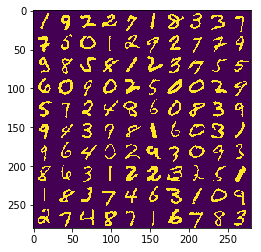

In [88]:
def showsample(data,n):
    blocked=data[:n*n].reshape((n,n,28,28))
    grid=list(map(list,blocked))
    plt.imshow(np.block(grid))
    plt.show()
    
showsample(mini_train_data,10)

# B.  Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, repres  enting white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?
### Note, the answers may vary depending on what thresholds you set.

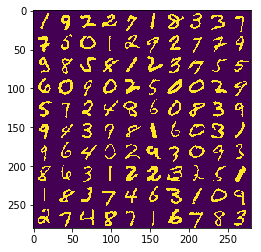

In [89]:
def showsample(data, n):
    blocked = data[:n * n].reshape((n, n, 28, 28))
    grid = list(map(list, blocked))
    plt.imshow(np.block(grid))
    plt.show()
    
showsample(mini_train_data, 10)

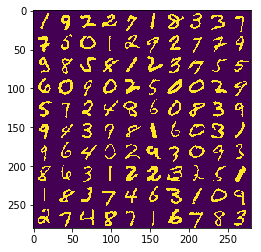

In [90]:
from sklearn.preprocessing import binarize

bindata=binarize(train_data)
showsample(bindata,10)

In [ ]:
(clf.predict(test_data)==test_labels).sum()/test_data.shape[0]

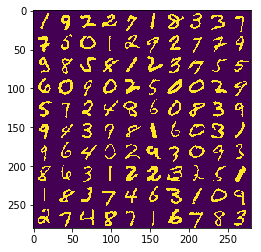

In [91]:
def extremize(x):
    if(x<0.25):
        return 0
    elif(x<0.75):
        return 1
    else:
        return 2
    
train_data.reshape(1,-1).shape
threesided=np.vectorize(extremize)(train_data)
showsample(threesided,10)

In [ ]:
clf=MultinomialNB()
clf.fit(threesided,train_labels)


In [94]:
def extremize(x):
    return np.floor(x*3)
train_data.reshape(1,-1).shape
threshold=np.vectorize(extremize)(train_data)
clf=MultinomialNB()
clf.fit(threesided,train_labels)
(clf.predict(test_data)==test_labels).sum()/test_data.shape[0]

0.8275555555555556

### C. Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Could you explain why?

In [87]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

clf.fit(train_data, train_labels)


(clf.predict(dev_data)!=dev_labels).sum()/dev_data.shape[0]



0.451